In [81]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.decomposition import PCA
from numba import jit, cuda
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [82]:
data=pd.read_csv('Brain Tumor.csv')
data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [83]:
Features_Scaling=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


data[Features_Scaling]=StandardScaler().fit_transform(data[Features_Scaling])
data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,Image2,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,Image3,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168
3,Image4,1,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,-1.117857e-168
4,Image5,0,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,-1.117857e-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,1.338116e-167
3758,Image3759,0,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,1.338116e-167
3759,Image3760,0,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,1.338116e-167
3760,Image3761,0,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,1.338116e-167


In [84]:
#PCA Dimension Reduction
data_prep=data.drop(['Image','Class'],axis=1,inplace=False)
pca=PCA(n_components=3)
pca_data=pca.fit_transform(data_prep)

In [85]:
pca_dataframe=pd.DataFrame(data=pca_data,columns=['Component-1','Component-2','Component-3'])
pca_dataframe['Class']=data['Class']
pca_dataframe.head()

,Component-1,Component-2,Component-3,Class
0,-1.134947,0.116539,-0.122074,0
1,-4.262143,-0.049437,1.500706,0
2,2.481383,-1.111446,-0.957833,1
3,3.074085,-0.235259,-0.388747,1
4,-0.900927,0.311275,1.345354,0


In [86]:
df=pd.DataFrame(data)
df['PCA-1']=pca_dataframe['Component-1']
df['PCA-2']=pca_dataframe['Component-2']
df['PCA-3']=pca_dataframe['Component-3']
df.tail()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,PCA-1,PCA-2,PCA-3
3757,Image3758,0,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,1.338116e-167,0.321001,-2.161311,1.250400
3758,Image3759,0,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,1.338116e-167,0.205905,-2.131569,1.261261
3759,Image3760,0,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,1.338116e-167,0.203598,-1.775664,1.133058
3760,Image3761,0,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,1.338116e-167,0.273145,-0.655034,1.593303
3761,Image3762,0,-0.589942,-0.492543,-0.370847,0.634342,0.003102,-0.121400,1.016485,0.784933,0.602848,0.117900,1.129143,-0.651387,1.348053e-167,-0.308959,1.213269,1.325361


In [87]:
#Ploting All Data
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# fig.set_size_inches(6,6,6)
# ax = fig.add_subplot(projection = '3d')

# x = pca_dataframe['Component-1']
# y = pca_dataframe['Component-2']
# z = pca_dataframe['Component-3']

# ax.scatter(x, y, z,c=df['Class'])

# ax.set_xlabel("PCA-1")
# ax.set_ylabel("PCA-2")
# ax.set_zlabel("PCA-3")

# plt.show()

In [88]:
#Data Spliting Operation 
X=df[['PCA-1','PCA-2','PCA-3']]
X=np.array(X)
Y=data['Class']
Y=np.array(Y)

# Spliting Data ----> 20% of Data= Test         80% Data=Train
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2) 
print('X_train Shape =', X_train.shape)
print('X_test Shape =', X_test.shape)
print('Y_train Shape =', Y_train.shape)
print('Y_test Shape =', Y_test.shape)

X_train Shape = (3009, 3)
X_test Shape = (753, 3)
Y_train Shape = (3009,)
Y_test Shape = (753,)


In [89]:
#Training Samples on the Data Frame
x_t=pd.DataFrame(X_train)
x_t['Class']=pd.DataFrame(Y_train)
x_t.tail()

,0,1,2,Class
3004,2.154127,1.327174,-2.078617,1
3005,2.040583,-3.266329,0.748238,1
3006,0.645536,0.365505,-2.386461,1
3007,-2.344412,-1.053339,0.395727,0
3008,-0.495092,-2.471462,1.577940,0


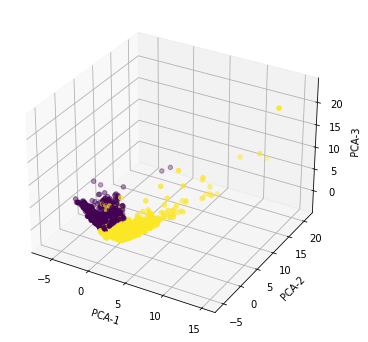

In [91]:
#Plotting Trainin Samples
fig2 = plt.figure()
fig2.set_size_inches(6,6,6)
ax = fig2.add_subplot(projection = '3d')

x = x_t[0]
y = x_t[1]
z = x_t[2]

ax.scatter(x, y, z,c=x_t['Class'])

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")

plt.show()

In [75]:
knn = KNeighborsClassifier(n_neighbors = 5) #setting up the KNN model to use 5NN
knn.fit(X_train, Y_train) #fitting the KNN

KNeighborsClassifier()

In [76]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, Y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, Y_test)))

Accuracy of K-NN classifier on training set: 0.98
Accuracy of K-NN classifier on test set: 0.98
